### Решение модельного уравнения

Необходимо решить модельное уравнение:
$$
\begin{align}
\label{eq:dalq}
u'(t) = \lambda u(t)
\end{align}
$$
с начальным условием $u(0) = 1$ с помошью явного и неявного метода Эйлера. Считать, что $\lambda = -200$. Провести расчеты на сетке с числом узлов $N = 1001; 101; 100$. Построить графики решения на одном рисунке, объяснить результат. А именно объяснить, что мы видим на графике для каждого случая, какое это имеет отношение к А-устойчивости, почему именно так. Если поведение графиков отличается, объяснить чем вызвано отличие.

(0.0, 0.1, -1.1, 1.1)

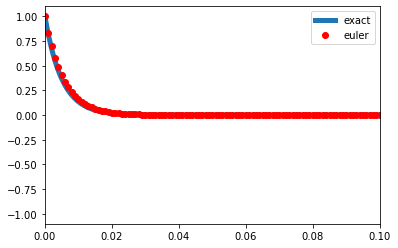

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#для модельного уравнения
#explicit Euler method
def ex_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = (1+l*h)*u[i]

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = u[i]/(1-l*h)

T = 1 # считае до этого момента
N = 1001
h = T/(N-1)
x = np.linspace(0,T,N) # сетка
x_teor = np.linspace(0,T,(N-1)*100+1) # сетка для точного решения
l = -200

u = np.zeros(N)
u[0] = 1 #начальное условие
#ex_euler(u, l, h, N)
im_euler(u, l, h, N)

plt.plot(x_teor, np.exp(l*x_teor), linewidth=5.0, label='exact')
plt.plot(x, u, 'ro', label='euler')
plt.legend()
plt.axis([0, 0.1, -1.1, 1.1])

Populating the interactive namespace from numpy and matplotlib


<Figure size 1152x360 with 0 Axes>

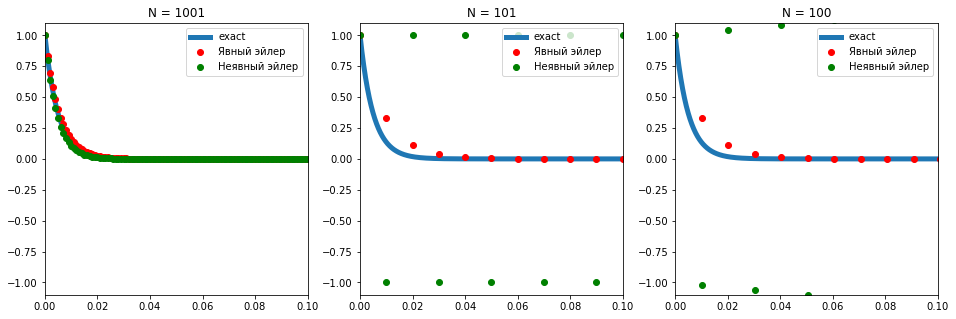

In [3]:
%pylab inline
plt.figure(figsize(16,5))
N_sample = [1001,101, 100]
fig, axs = plt.subplots(1,1+len(N_sample))
for i in range(len(N_sample)):
    T = 1 # считае до этого момента
    N = N_sample[i]
    h = T/(N-1)
    x = np.linspace(0,T,N) # сетка
    x_teor = np.linspace(0,T,(N-1)*100+1) # сетка для точного решения
    l = -200
    u, v = np.zeros(N), np.zeros(N)
    u[0], v[0] = 1, 1 #начальное условие
    
    ex_euler(v, l, h, N)
    im_euler(u, l, h, N)
    
    plt.subplot(131+i)
    plt.plot(x_teor, np.exp(l*x_teor), linewidth=5.0, label='exact')
    plt.plot(x, u, 'ro', label='Явный эйлер')
    plt.plot(x, v, 'go', label='Неявный эйлер')
    plt.title(f'N = {N_sample[i]}')
    plt.legend()
    plt.axis([0, 0.1, -1.1, 1.1])
    
plt.show()    


### L-устойчивость

Рассматриваем задачу $u' = l(u-cos(t)) - sin(t)$. Для начального условия $u(0) = 1$ решение $u(t) = cos(t)$. Для начального условия  $u(0) = g$ решение $u(t) = e^{lt}(g-1) + cos(t)$. Решите задачу на сетке с шагом $h = 0.1$ для начального условия $u(0) = 1$ и $u(0) = 1.5$ методом Эйлера и методом трапеции. В качестве решения постройте две картинки для разных начальных условий. На каждой картинке должно быть два графика для каждого из методов и сравнение с точным решением. Объясните получившиеся результаты. Как они согласуются с теорией? При чем тут L-устойчивость? 

Метод трапеции $$ \frac{u_{n+1} - u_n}{h} = \frac{f(t_n, u_n)+f(t_{n+1}, u_{n+1})}{2}. $$


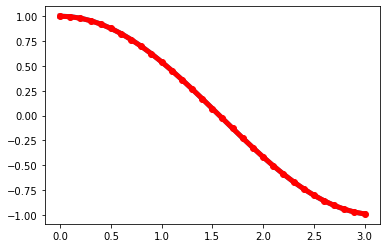

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        # TODO : реализуйте неявный метод Эйлера для рассматриваемой задачи
        #u[i+1] = u[i] + h*l*((u[i+1] - np.cos(t+1)) - np.sin(t+1))
        free = h*(l*np.cos((i+1)*h) + np.sin((i+1)*h))
        u[i+1] = (u[i] - free)/(1-l*h)

#trapezoidal method
def trapezoidal(u, l, h, N):
    for i in range(0, N-1):
        free = l*(np.cos((i+1)*h)+np.cos(i*h))+(np.sin((i+1)*h)+np.sin(i*h))
        u[i+1] = (u[i]*(1+l*h/2)-h/2*free)/(1-l*h/2)

T = 3
N = 31
h = T/(N-1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)
l = -1e6

u = np.zeros(N)
#initial condition
u[0] = 1
#u[0] = 1.5

#method
im_euler(u, l, h, N)
#trapezoidal(u, l, h, N)

# TODO: добавьте легенду на графики
plt.plot(x_teor, np.cos(x_teor),  x, u, '-ro', linewidth=5.0)

<Figure size 1152x360 with 0 Axes>

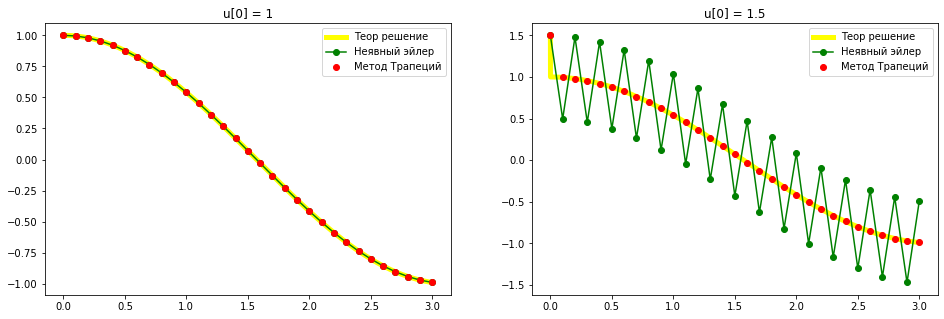

In [8]:
initial_condition = [1, 1.5]
u = np.zeros(N)
#initial condition
plt.figure(figsize(16,5))
fig, axs = plt.subplots(1,1+len(initial_condition))
for i in range(len(initial_condition)):
    T = 3
    N = 31
    h = T/(N-1)
    x_teor = np.linspace(0,T,(N-1)*100+1) 
    x = np.linspace(0,T,N)
    l = -1e6
    u, v = np.zeros(N), np.zeros(N)
    #initial condition
    u[0], v[0] = initial_condition[i], initial_condition[i]
    trapezoidal(v, l, h, N)
    im_euler(u, l, h, N)
    plt.subplot(121+i)
    plt.plot(x_teor, np.cos(x_teor)+(u[0] - 1)*np.exp(l*x_teor), 'yellow', label='Теор решение', linewidth=5.0)
    plt.plot(x, v, '-go', label='Неявный эйлер')
    plt.plot(x, u, 'ro', label='Метод Трапеций')
    plt.title(f'u[0] = {initial_condition[i]}')
    plt.legend()
plt.show() 